In [2]:
# You can set your own compiled m2aia libraries by adding M2AIA_PATH
# import os
# os.environ["M2AIA_PATH"] = "/home/jtfc/HS/M2aia/m2aia-dev/m2aia-release/MITK-build/lib/"

import m2aia as m2
import numpy as np

# download the example files if required
# for all examples continuos profile data are used
from download_helper import DownloadMTBLS2639
# if wanted, you can replace the file_names list with data on your disk
# e.g. filenames = ["my/files/location/data.imzML", "..."]
file_names = DownloadMTBLS2639(selection=[2]) # only slice 3 is selected, you choose fom [0,1,2,3]


In [3]:
import m2aia as m2
from contextlib import contextmanager
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(19,6)})


In [4]:
import matplotlib.pyplot as plt
imz = 190

# read the data
I = m2.ImzMLReader(file_names[0], normalization=m2.m2NormalizationTIC)
ys_1 = I.GetMeanSpectrum()
xs = I.GetXAxis()

I.SetIntensityTransformation(m2.m2IntensityTransformationSquareRoot)

# load is required to e.g. update overview spectra
# if the overview spectra are not of relevance, the newly set processing methods
# are applied to spectra ion-images without reloading
# In this case we want to compare the overview spectra with different settings
# so we need to ...
I.Load()
ys_2 = I.GetMeanSpectrum()

I.SetSmoothing(m2.m2SmoothingGaussian,4)
I.Load()
ys_3 = I.GetMeanSpectrum()

I.SetSmoothing(m2.m2SmoothingGaussian, 50)
I.Load()
ys_4 = I.GetMeanSpectrum()

[Sat Nov 18 15:43:49 2023 
29.571] [imzML]: data/150429_ew_section2_pos.imzML
	[pixel size (mm)]: 0.025000x0.025000x0.010000
	[image dimension]: 220x171x1
	[num spectra]: 26744
	[spec. type]: ContinuousProfile
	[mass range]: 99.792458 to 1285.640137 with #29693 measurements
	[normalization]: TIC
[54.970] [imzML]: data/150429_ew_section2_pos.imzML
	[pixel size (mm)]: 0.025000x0.025000x0.010000
	[image dimension]: 220x171x1
	[num spectra]: 26744
	[spec. type]: ContinuousProfile
	[mass range]: 99.792458 to 1285.640137 with #29693 measurements
	[normalization]: TIC
	[processing]: SquareRoot
[89.587] [imzML]: data/150429_ew_section2_pos.imzML
	[pixel size (mm)]: 0.025000x0.025000x0.010000
	[image dimension]: 220x171x1
	[num spectra]: 26744
	[spec. type]: ContinuousProfile
	[mass range]: 99.792458 to 1285.640137 with #29693 measurements
	[smoothing]: Gaussian(4)
	[normalization]: TIC
	[processing]: SquareRoot
[266.590] [imzML]: data/150429_ew_section2_pos.imzML
	[pixel size (mm)]: 0.025000x0

Intensities 29693
Intensities in m/z range 2539


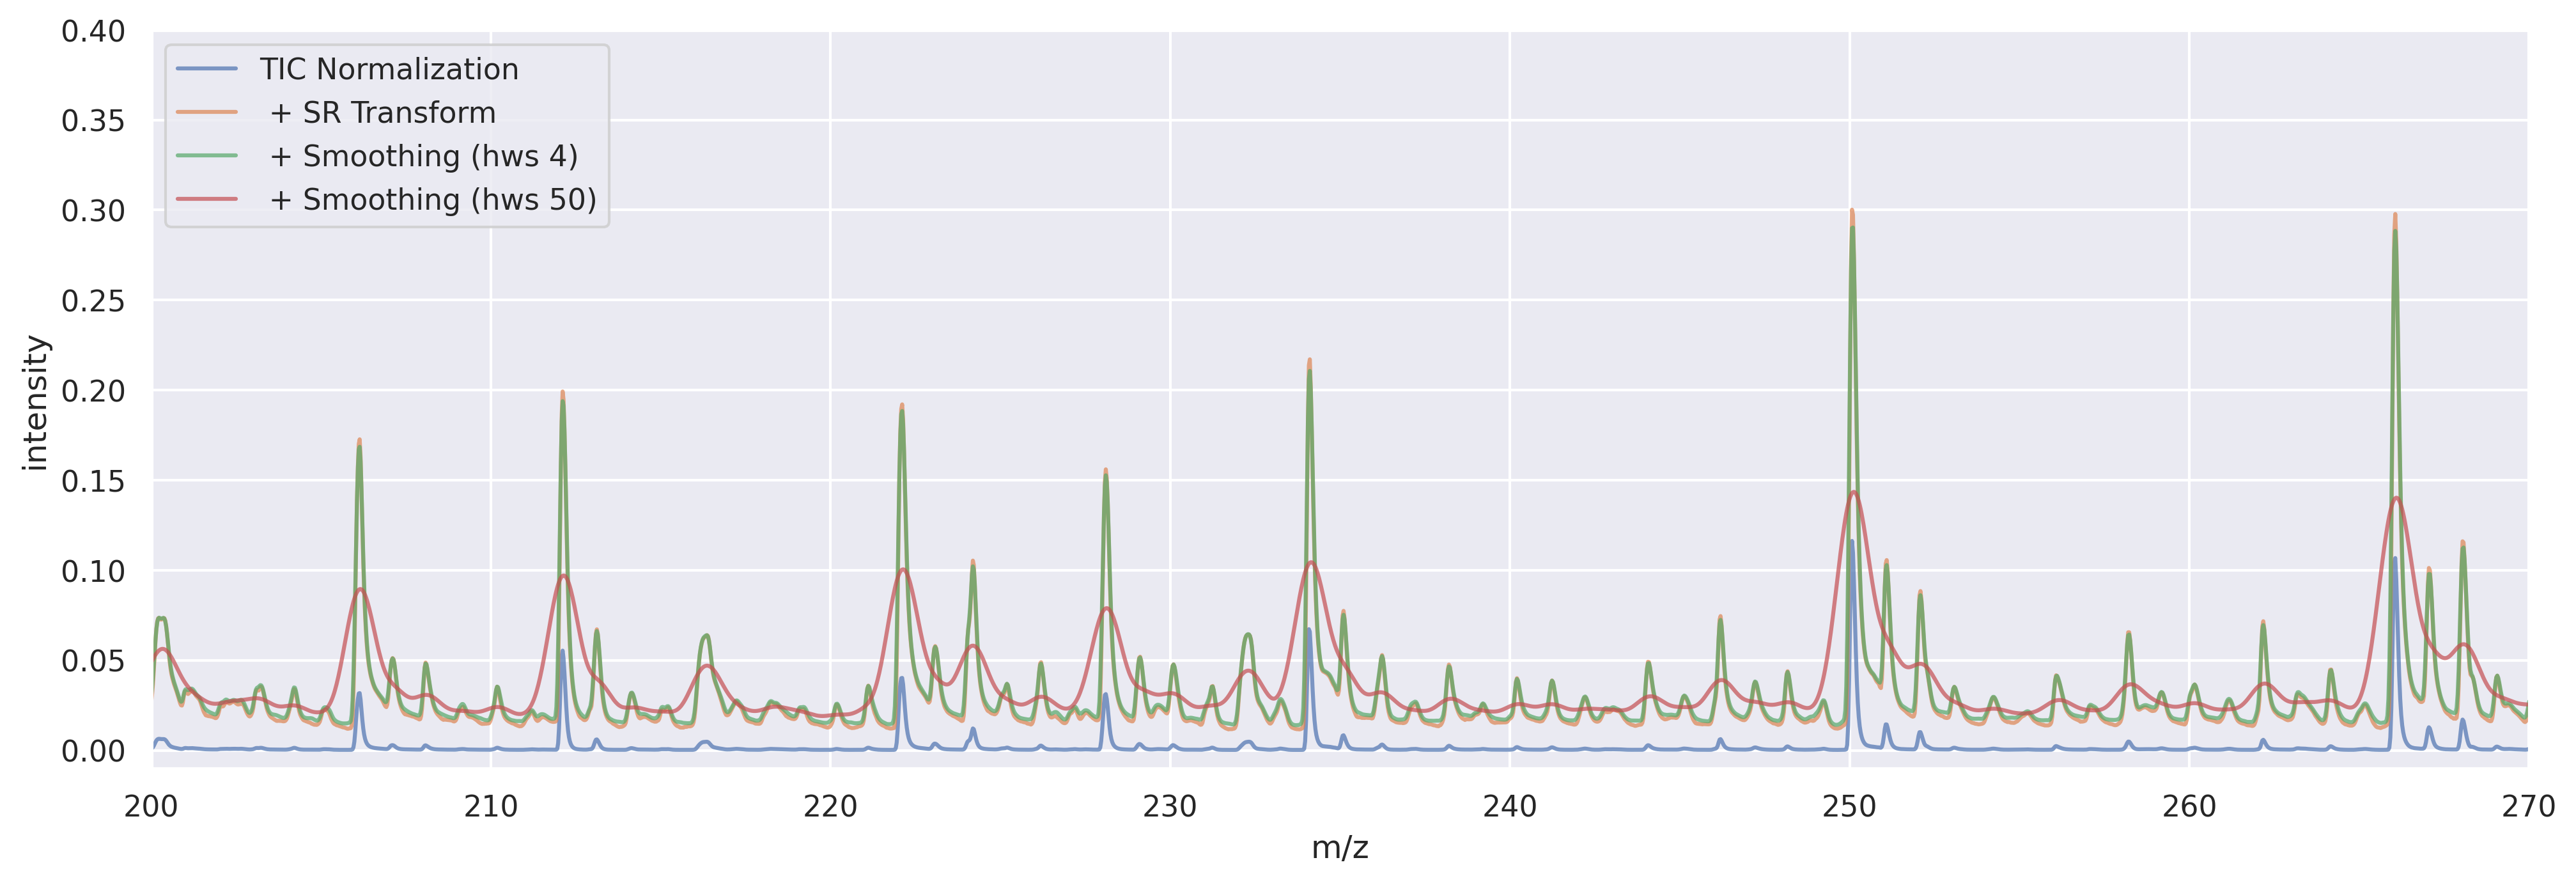

In [9]:
x_lim = [200,270]
plt.figure(figsize=(16,5), dpi=300)
# plt.gca().set_aspect(3)

plt.xlim(x_lim)
plt.ylim([-0.01,0.4])
plt.xlabel('m/z')
plt.ylabel('intensity')
plt.plot(xs, ys_1, alpha=0.7)
plt.plot(xs, ys_2, alpha=0.7)
plt.plot(xs, ys_3, alpha=0.7)
plt.plot(xs, ys_4, alpha=0.7)
plt.plot(imz,0, 'r^')
plt.legend(['TIC Normalization', ' + SR Transform', ' + Smoothing (hws 4)', 
            ' + Smoothing (hws 50)'])
plt.savefig('results/example_ii.png', dpi=350)

print(f'Intensities', I.GetXAxisDepth())
print(f'Intensities in m/z range {np.sum(xs >= x_lim[0]) - np.sum(xs > x_lim[1])}')